## Unsupervised Learning. Dimensionality Reduction

In **unsupervised learning**, the dataset is a collection of **unlabeled examples** $\{\textbf{x}_i\}_{i=0}^N$
Again, **x** is a feature vector, and the goal of an unsupervised learning algorithm is
to create a model that takes a feature vector **x** as input and either transforms it into
another vector or into a value that can be used to solve a practical problem.

## Types of problems

- **clustering**: the model returns the id of the cluster for each feature vector in the dataset;
- **dimensionality reduction**: the output of the model is a feature vector that has fewer features than the input **x**;
- **outlier detection**: the output is a real number that indicates
how **x** is different from a “typical” example in the dataset.

In [80]:
%reset -f

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN

from sklearn.metrics.cluster import adjusted_rand_score

In [82]:
FIGSIZE = (12, 10)

plt.rc('figure', figsize=FIGSIZE)
sns.set_style('whitegrid')

## Clustering

**Clustering** is a problem of learning to assign a label to examples by leveraging an unlabeled
dataset. Because the dataset is completely unlabeled, deciding on whether the learned model
is optimal is much more complicated than in supervised learning.

> **Definition**: A cluster is a group of similar points.

### K-Means

- Divides the dataset into `k` similar groups.
- How does it work? First, you choose `k` — the number of
clusters. Then you randomly put `k` feature vectors, called centroids, to the feature space.
We then compute the distance from each example `x` to each centroid `c` using some metric,
like the Euclidean distance. Then we assign the closest centroid to each example (like if we labeled each example with a centroid id as the label). For each centroid, we calculate the average feature vector of the examples labeled with it. These average feature vectors become the new locations of the centroids. We recompute the distance from each example to each centroid, modify the assignment and
repeat the procedure until the assignments don’t change after the centroid locations were
recomputed. The model is the list of assignments of centroids IDs to the examples.
- Advantages:
  - fast;
  - scales well to large number of samples;
  - has been used across a large range of application areas in many different fields.
- Disadvantages:
  - the initial position of centroids influence the final positions, so two runs of k-means can
result in two different models;
  - the value of `k`, the number of clusters, is a hyperparameter that can be tuned. There are no proven optimal techniques for selecting `k`. Most of them require an `educated guess` by looking at some
metrics or by examining cluster assignments visually;
  - cannot deal with non-linear cluster shapes.

In [83]:
X, y = make_blobs(random_state=1)
X

array([[-7.94152277e-01,  2.10495117e+00],
       [-9.15155186e+00, -4.81286449e+00],
       [-1.14418263e+01, -4.45781441e+00],
       [-9.76761777e+00, -3.19133737e+00],
       [-4.53655648e+00, -8.40186288e+00],
       [-6.26302115e+00, -8.10666081e+00],
       [-6.38481234e+00, -8.47302970e+00],
       [-9.20490564e+00, -4.57687928e+00],
       [-2.76017908e+00,  5.55121358e+00],
       [-1.17104176e+00,  4.33091816e+00],
       [-1.00364080e+01, -5.56912090e+00],
       [-9.87589123e+00, -2.82386464e+00],
       [-7.17532921e+00, -8.77059017e+00],
       [-2.40671820e+00,  6.09894447e+00],
       [-4.87418245e+00, -1.00495890e+01],
       [-6.07854700e+00, -7.93969420e+00],
       [-6.83238762e+00, -7.47067670e+00],
       [-2.34673261e+00,  3.56128423e+00],
       [-1.03415662e+01, -3.90975169e+00],
       [-1.10926243e+01, -3.78396611e+00],
       [-6.50212109e+00, -7.91249101e+00],
       [-1.02639310e+01, -3.92073400e+00],
       [-6.81608302e+00, -8.44986926e+00],
       [-1.

In [84]:
y

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

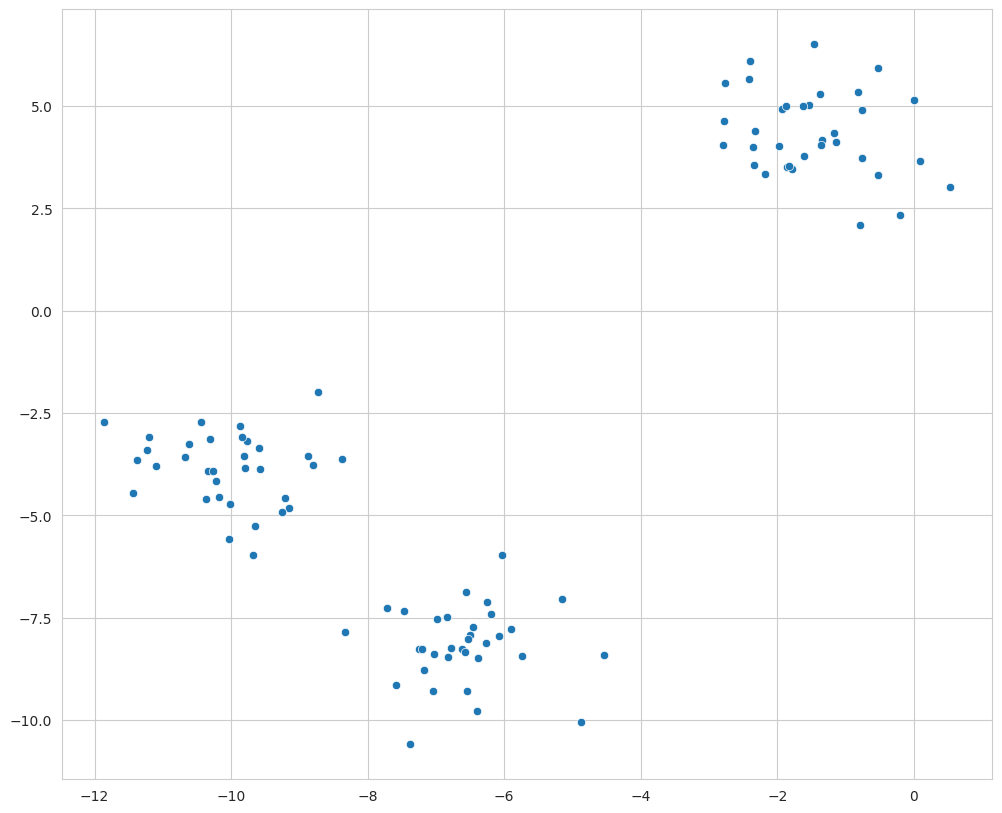

In [85]:
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1])

We'll try to get the following diagram but by using K-Means instead of the true labels `y`.

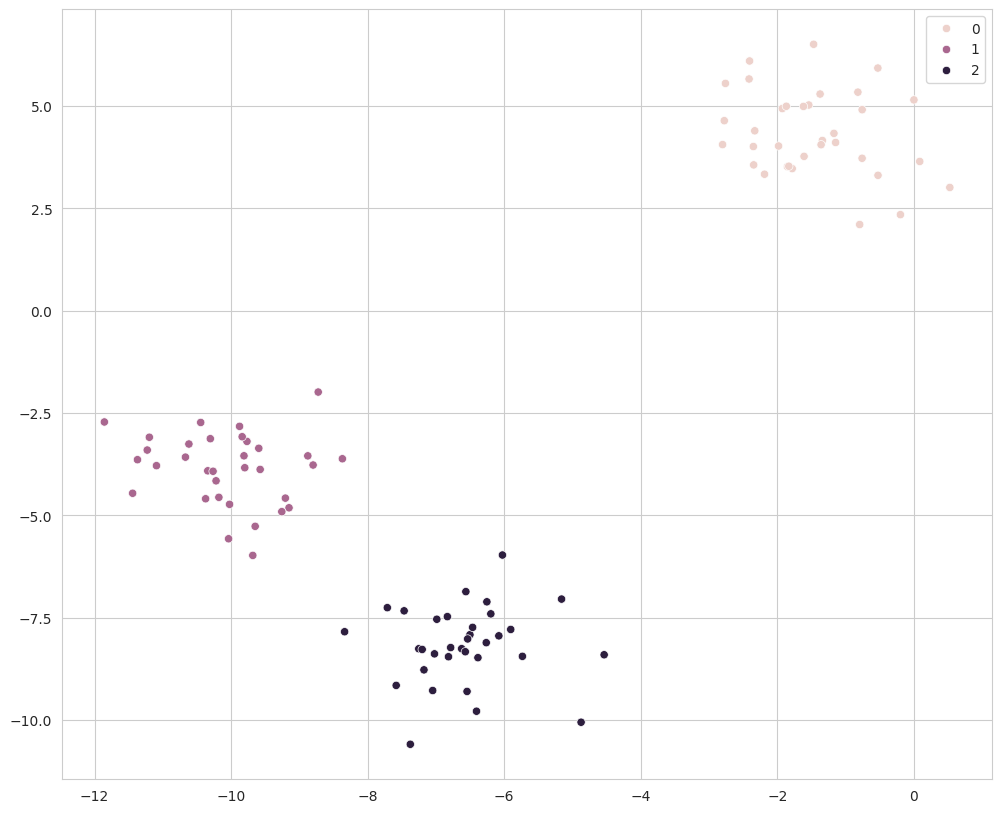

In [86]:
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

#### Trying out an example

In [87]:
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)
y_pred

array([1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1], dtype=int32)

> **Notes**:
>   1. It may be obvious but the `.fit` method **does not** accept `y`.
>   2. `y_pred` does not necessarily equal `y`. 

In [88]:
y

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

In [89]:
y_pred == y

array([False, False, False, False,  True,  True,  True, False, False,
       False, False, False,  True, False,  True,  True,  True, False,
       False, False,  True, False,  True, False, False,  True,  True,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False, False, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
       False, False,  True, False,  True, False, False, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False,  True,
       False])

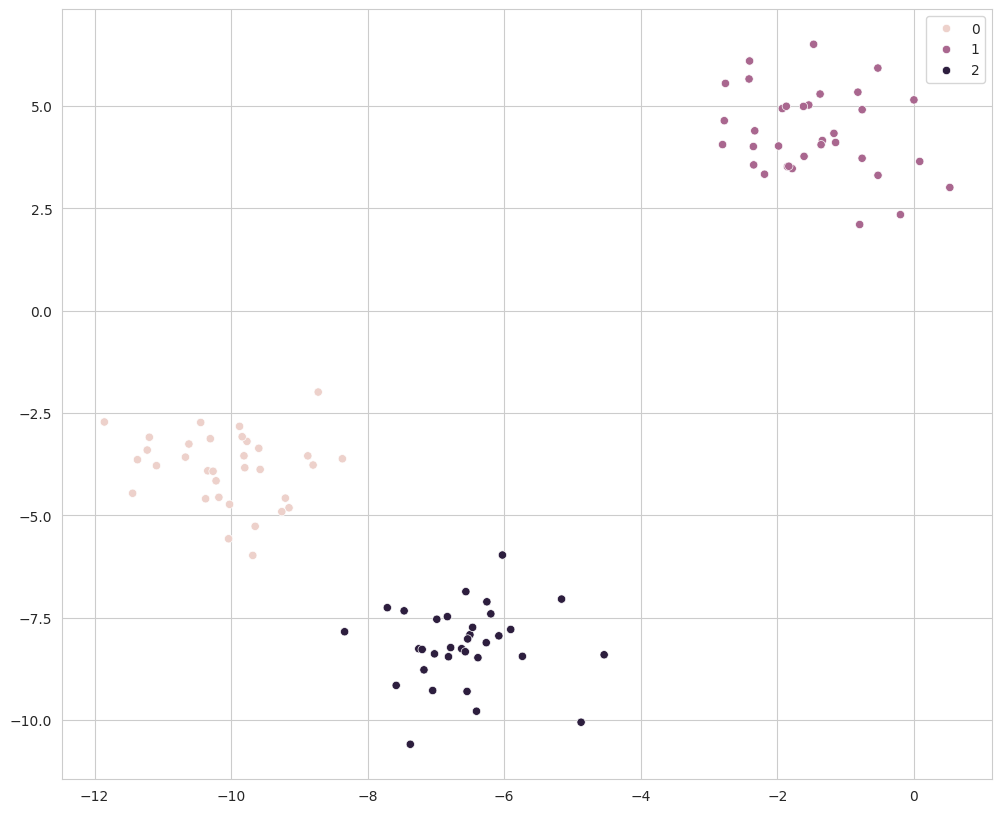

In [90]:
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred)

#### Measuring performance

**If we had the true labels**, we could measure the performance of our model by using the metric *adjusted Rand index*. It is a function that measures the similarity of the two assignments, ignoring permutations. Note that this is not accuracy - it is a measure of similarity.

More on Rand index: https://www.youtube.com/watch?v=6rjTIwn0yWI, https://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-score

**K-Means Objective**

The objective in the K-means is to reduce the sum of squares of the distances of points from their respective cluster centroids. It has other names like J-Squared error function, J-score or within-cluster sum of squares. This value tells how internally coherent the clusters are (the closer to `0`, the better).

**If we didn't know the true labels**, we could use the built-in `.score` method. It returns the negative of the K-means objective. 

> **Note**: Although the result from `.score` might be low, this **does not guarantee** that the clusters are appropriate.

In [91]:
adjusted_rand_score(y, y_pred)

1.0

In [92]:
kmeans.score(X)

-156.28289251170003

In [93]:
kmeans.cluster_centers_

array([[-10.04935243,  -3.85954095],
       [ -1.4710815 ,   4.33721882],
       [ -6.58196786,  -8.17239339]])

If we don't know the number of clusters, K-Means is not that helpful.

0.5737902531427588
-661.5698490972003


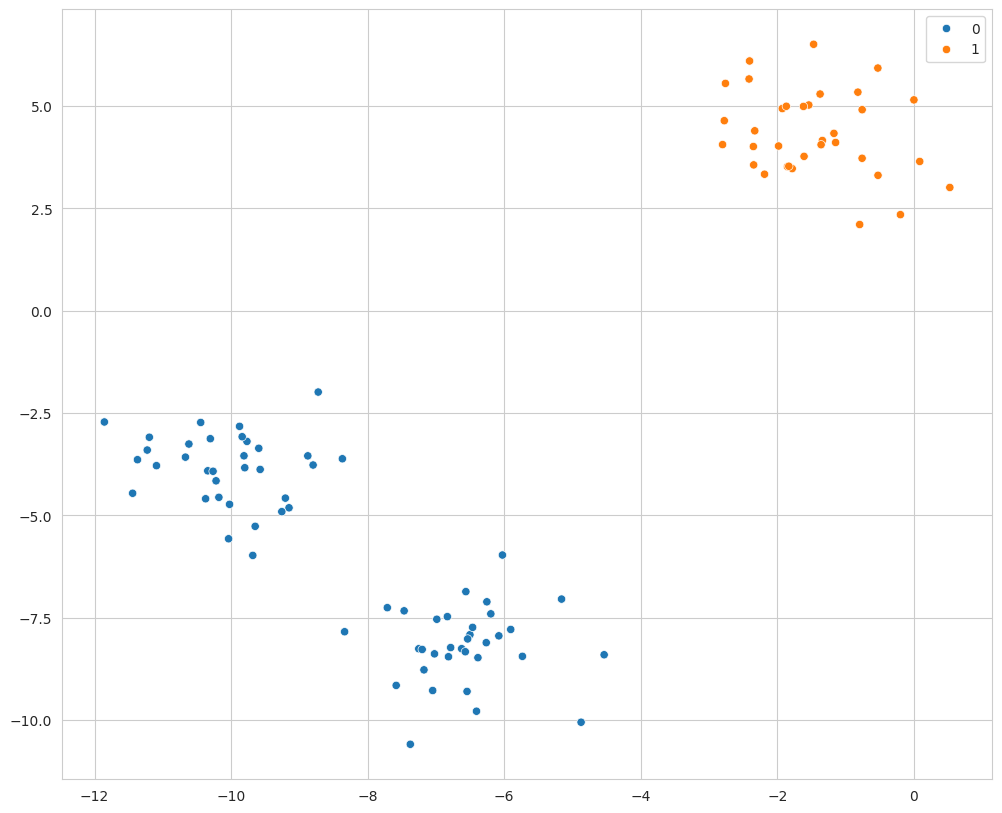

In [94]:
kmeans = KMeans(n_clusters=2)
y_pred = kmeans.fit_predict(X)
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred)

print(adjusted_rand_score(y, y_pred))
print(kmeans.score(X))

0.7204255576376716
-112.05653036061503


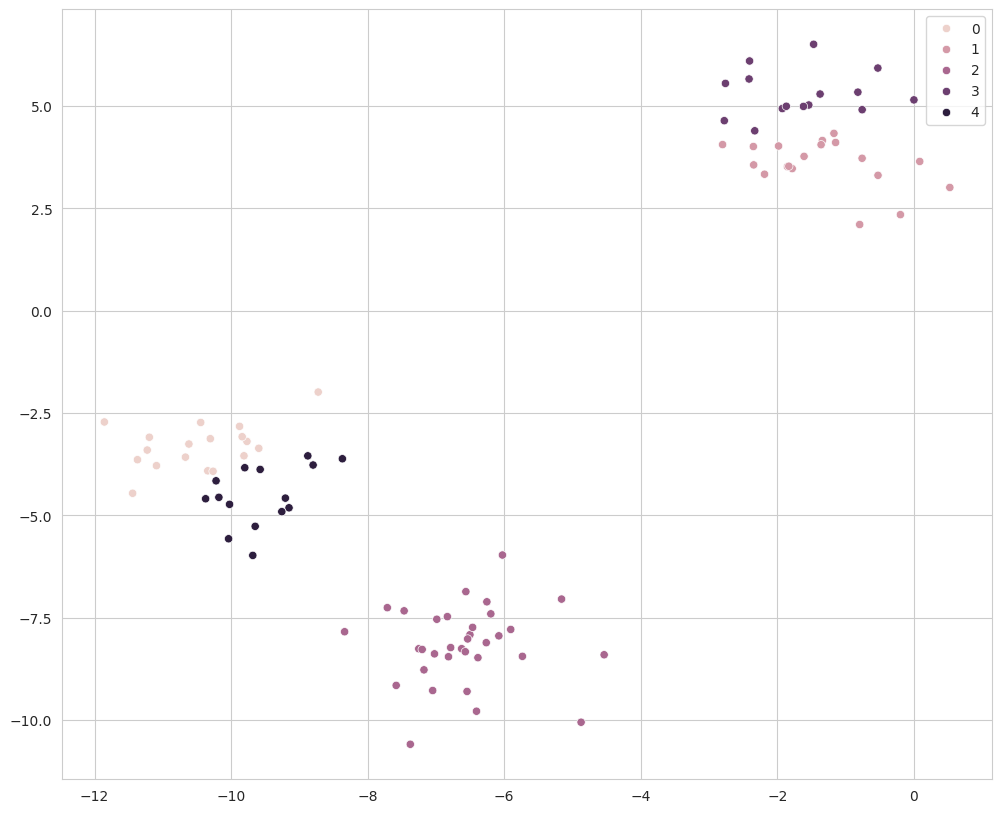

In [95]:
kmeans = KMeans(n_clusters=5)
y_pred = kmeans.fit_predict(X)
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred)

print(adjusted_rand_score(y, y_pred))
print(kmeans.score(X))

#### The shape matters

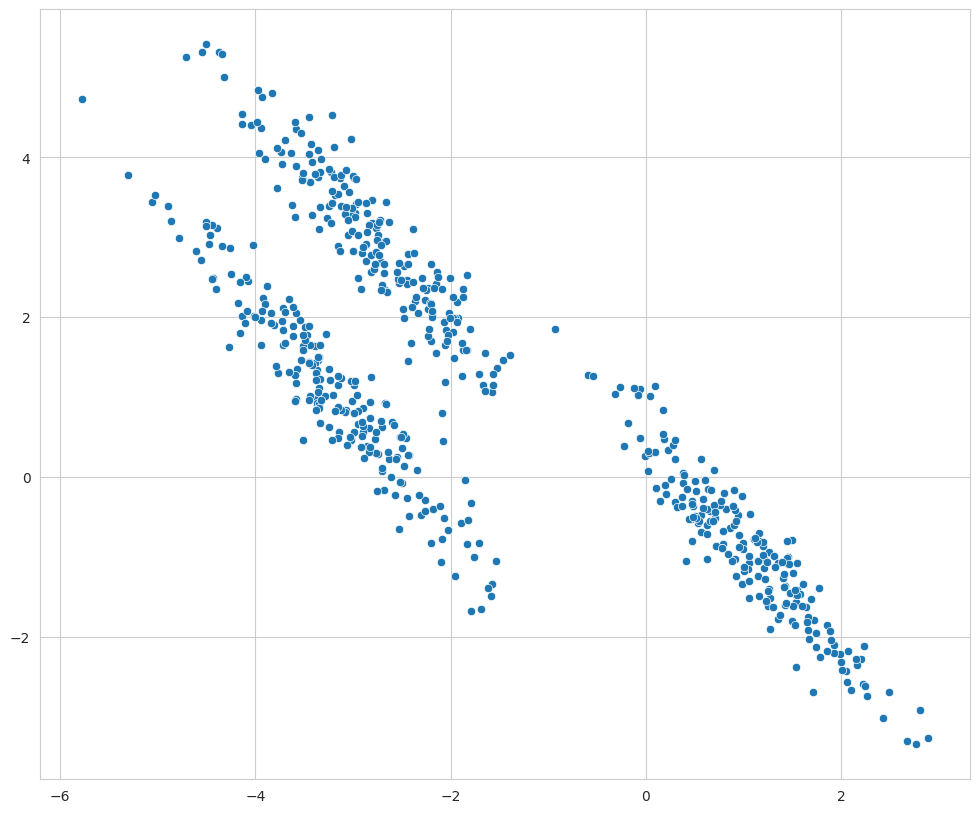

In [96]:
np.random.seed(74)
X, y = make_blobs(random_state=170, n_samples=600)
X = np.dot(X, np.random.randn(2, 2))
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1])

/tmp/ipykernel_35504/3853716067.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], palette='orange', s=500)


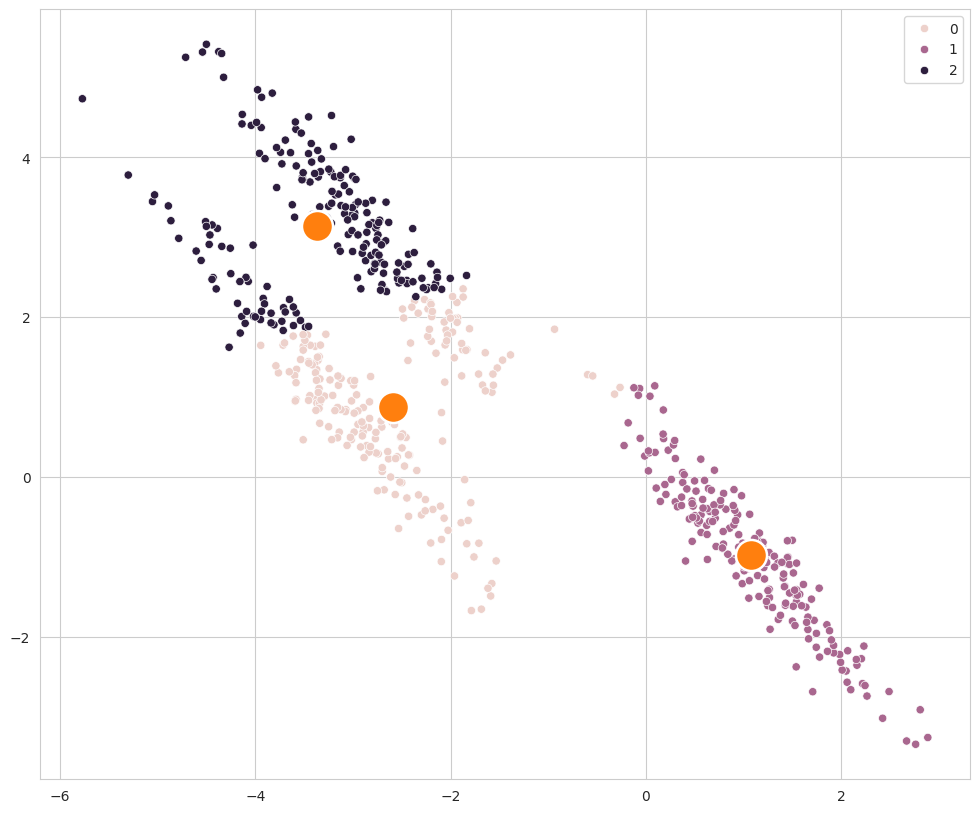

In [97]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred)
ax = sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], palette='orange', s=500)

/tmp/ipykernel_35504/1845723172.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], palette='orange', s=500)


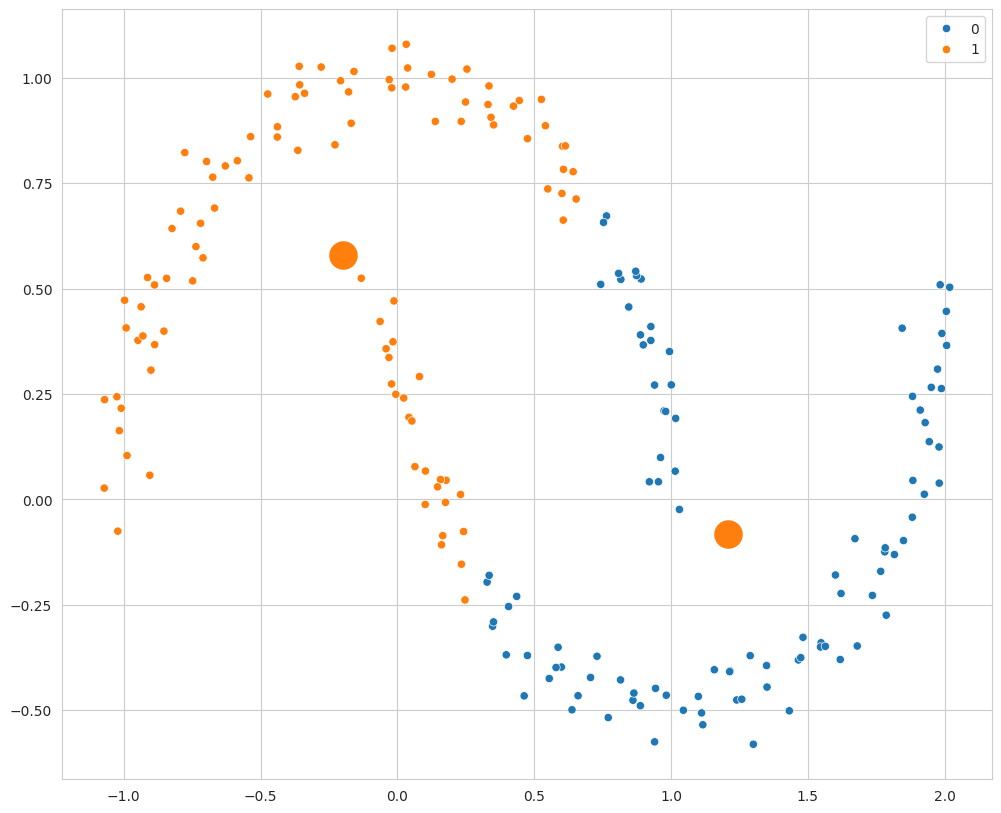

In [98]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred)
ax = sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], palette='orange', s=500)

### Agglomerative Clustering

How does it work?

1. Every point becomes a cluster.
2. The most "similar" clusters get combined into one.
3. Repeats step 2 until there are $k$ clusters.

In Sklean the definition of similarity is controlled by the `affinity` and `linkage` [hyperparameters](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).

Disadvantages:
  - requires `k`
  - cannot deal with non-linear shapes
  - does not have a `.predict` method

![Alt](https://cdn-images-1.medium.com/max/800/1*ET8kCcPpr893vNZFs8j4xg.gif)

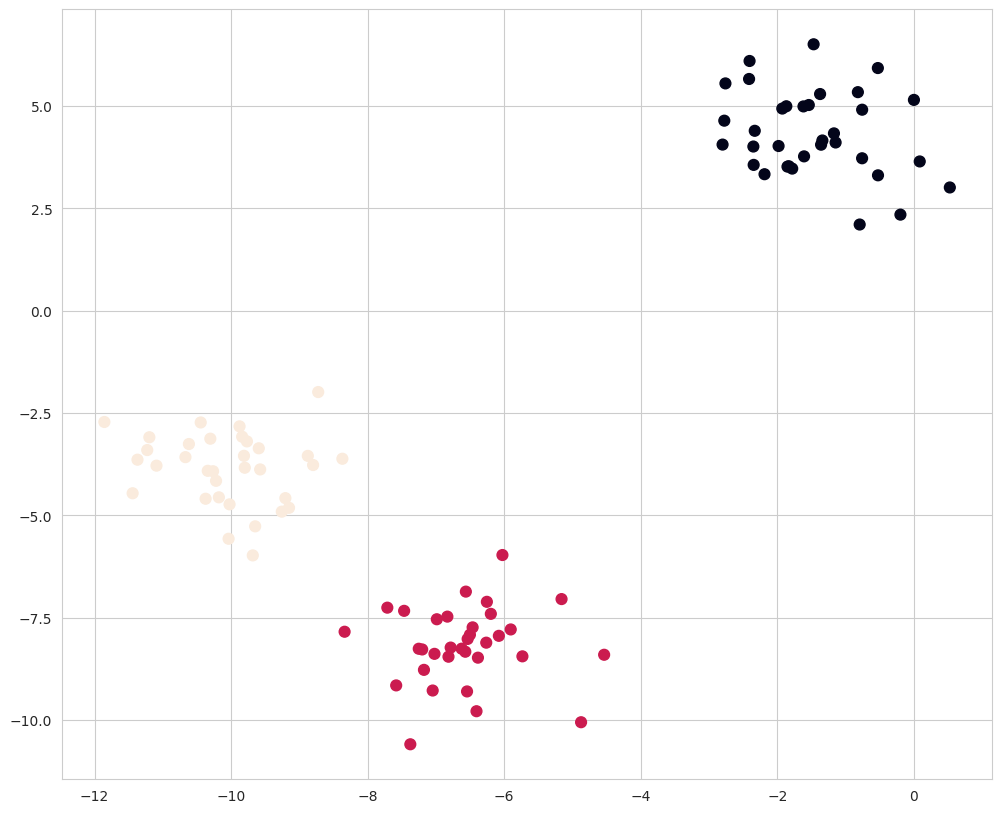

In [99]:
X, y = make_blobs(random_state=1)

y_pred = AgglomerativeClustering(n_clusters=3).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60)
plt.show()

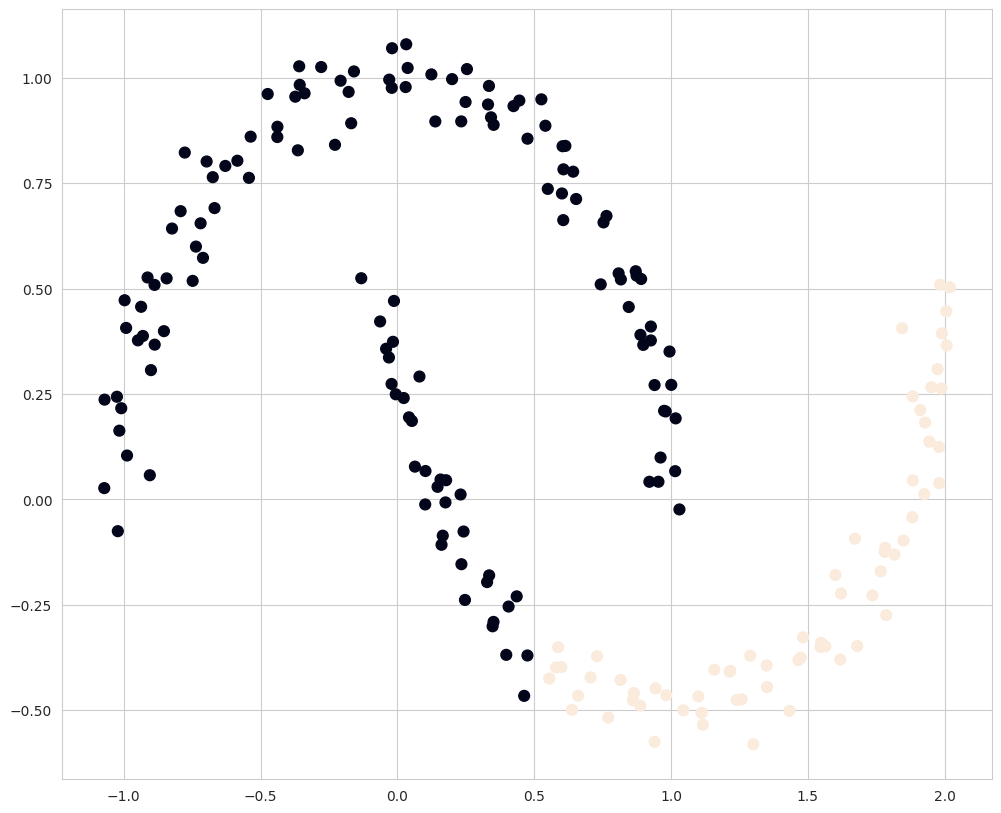

In [100]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

y_pred = AgglomerativeClustering(n_clusters=2).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60)
plt.show()

### DBSCAN

While k-means and similar algorithms are **centroid-based**, Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a **density-based**
clustering algorithm. Instead of guessing how many clusters you need, by using DBSCAN,
you define two hyperparameters: $ϵ$ and $n$.

How does it work?

- two main parameters `eps` and `min_samples`;
- points get classified either as `core sample`, `boundary points`, or `noise`;
  - core samples are points with `min_samples` or more neighbors that are at distance `eps` or less;
  - boundary points are samples that are neighbors of a core sample in the cluster but are not themselves core samples (do not have `min_samples` neighbors);
  - noise is everything else.

Advantages:
  - does not require a number of clusters
  - can work with any shapes

Disadvantages:
  - slow
  - has two hyperparameters and choosing good
values for them (especially `eps`) could be challenging. Furthermore, having `eps` fixed, the clustering
algorithm cannot effectively deal with clusters of varying density.

More on DBSCAN: https://scikit-learn.org/stable/modules/clustering.html#dbscan, https://www.youtube.com/watch?v=RDZUdRSDOok

![Alt](https://dashee87.github.io/images/DBSCAN_tutorial.gif)

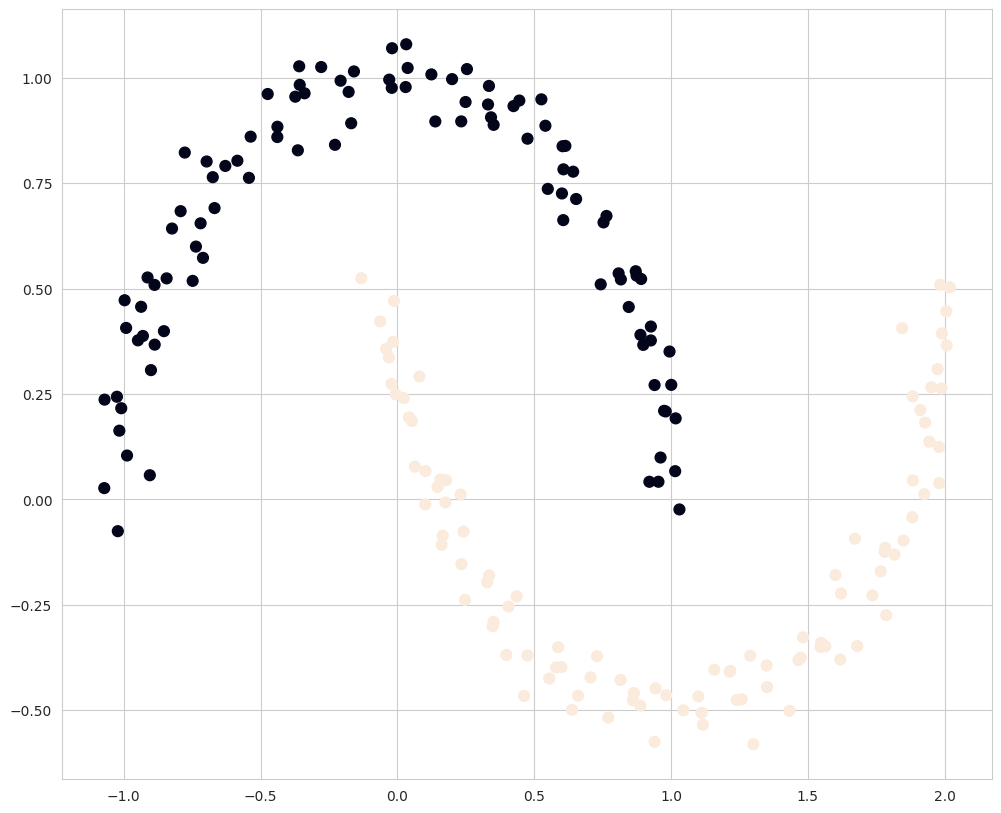

In [101]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

y_pred = DBSCAN(eps=0.2).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60)
plt.show()

With an appropriate value for `eps`, DBSCAN can handle the strange three clusters we created earlier.

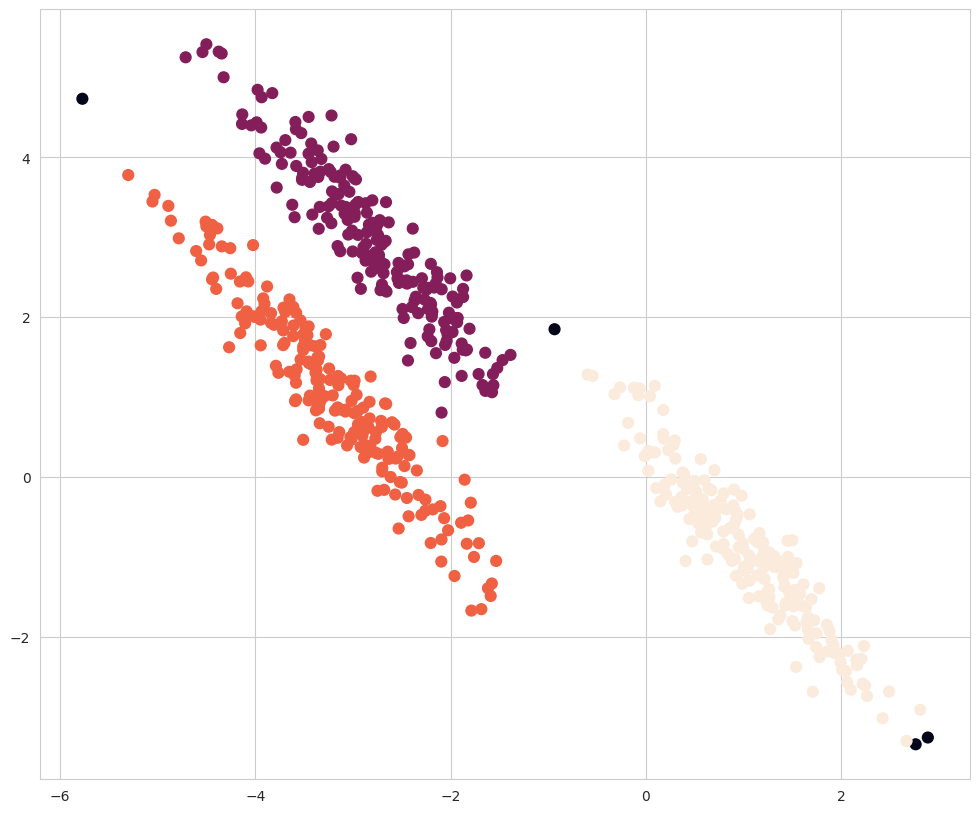

In [102]:
np.random.seed(74)
X, y = make_blobs(random_state=170, n_samples=600)
X = np.dot(X, np.random.randn(2, 2))
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1])

dbscan = DBSCAN(eps=0.4)
clusters = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters, s=60)
plt.show()

### HDBSCAN 

The clustering algorithm that keeps the advantages of DBSCAN while removing the need to decide on the value of `eps`. The algorithm is capable of building clusters of
varying density.

It has one important hyperparameter: `n` - the minimum number of examples to put in a cluster. This hyperparameter is relatively simple to choose by intuition or domain knowledge.

> **Note**: Because this algorithm is not implemented in sklearn, we have to install another package that provides it - https://pypi.org/project/hdbscan/.

Advantage:

- no hyperparameter tuning.

Disadvantage:

- slow.

You can install 

```console
pip install hdbscan
```

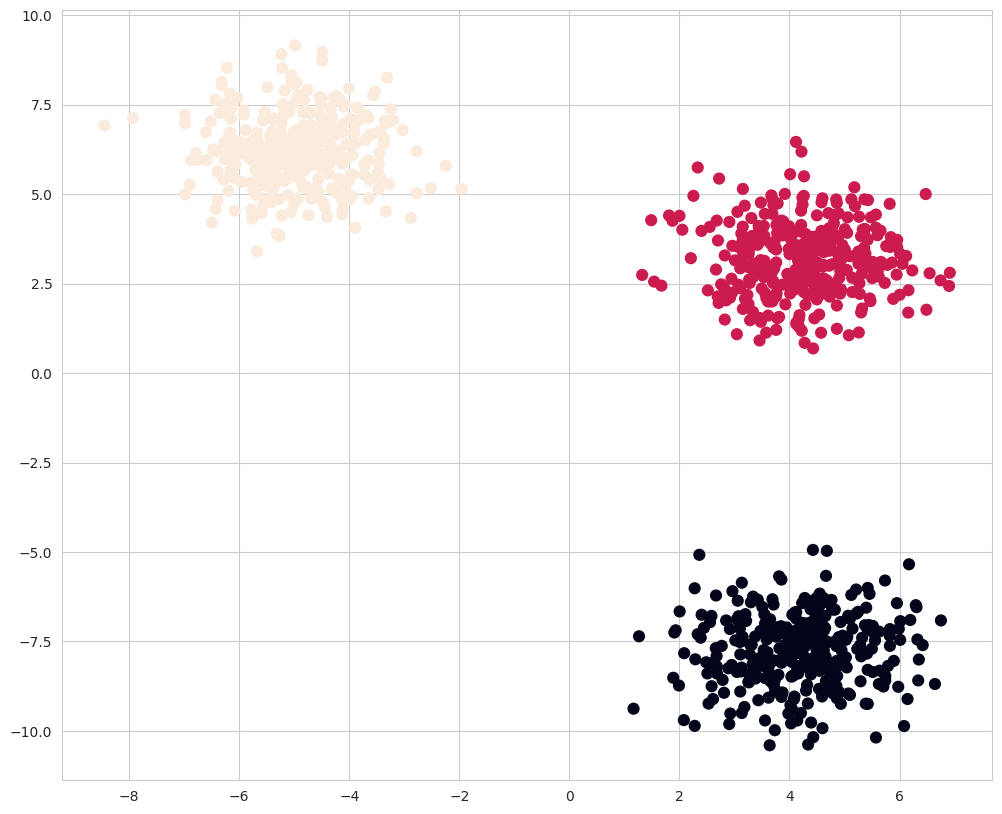

In [103]:
X, _ = make_blobs(1000)

y_pred = HDBSCAN(min_cluster_size=10).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60)
plt.show()

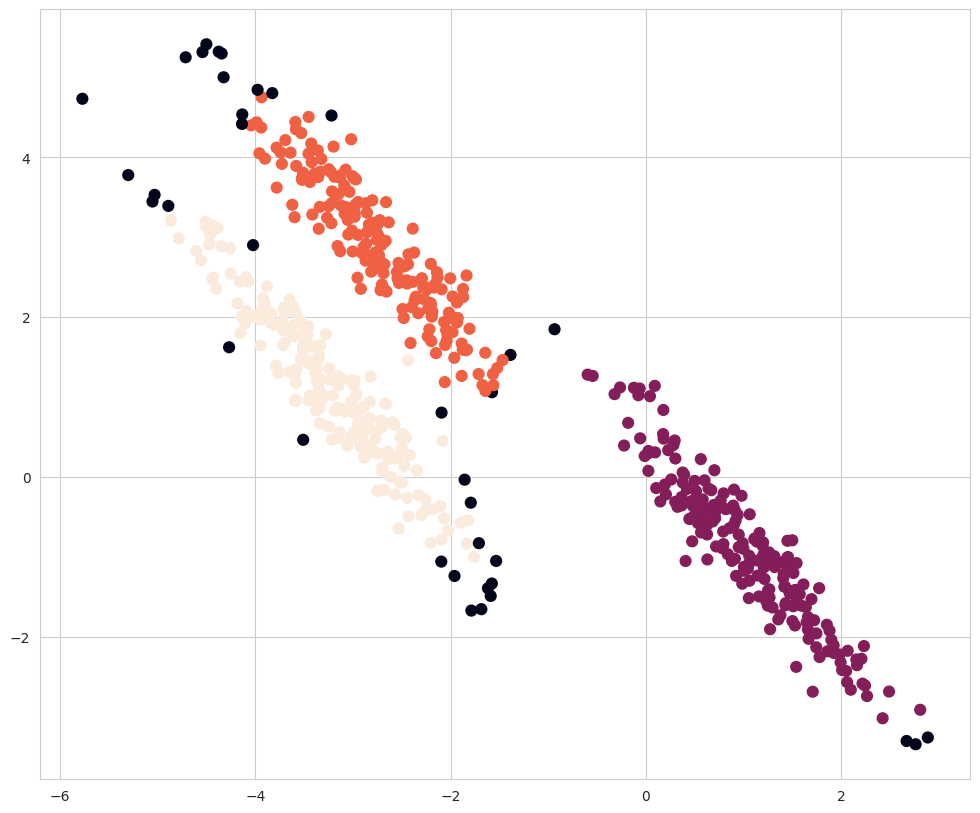

In [106]:
np.random.seed(74)
X, y = make_blobs(random_state=170, n_samples=600)
X = np.dot(X, np.random.randn(2, 2))
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1])

y_pred = HDBSCAN(min_cluster_size=10).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60)
plt.show()

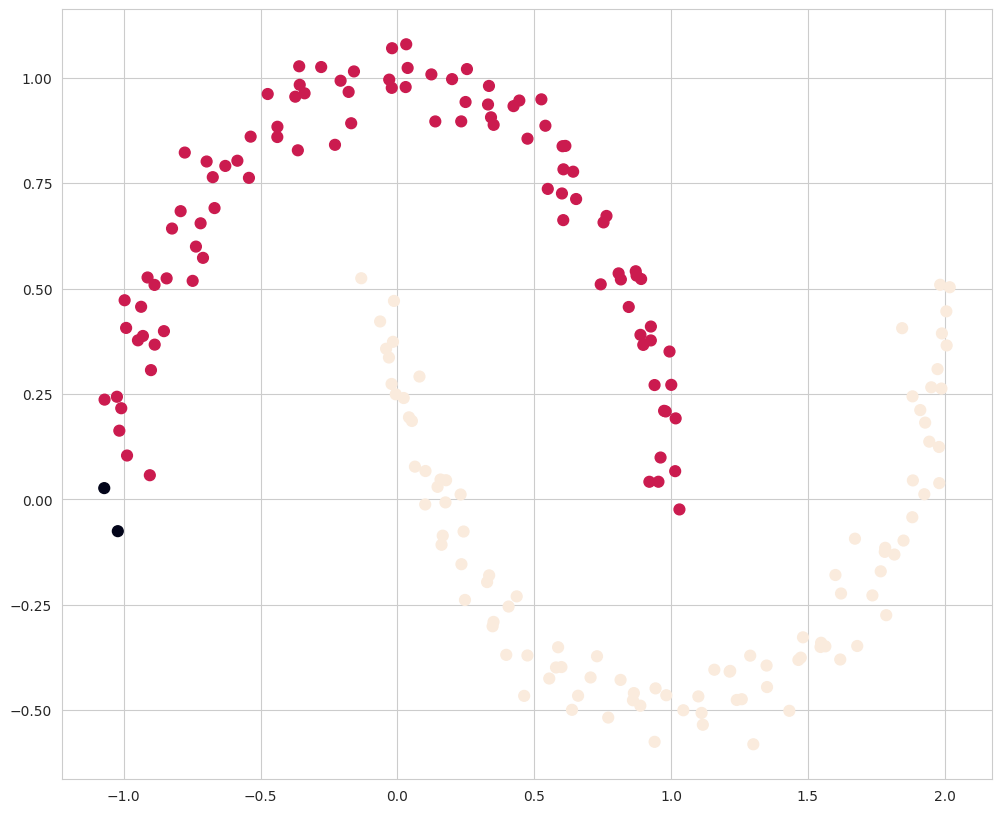

In [105]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

y_pred = HDBSCAN(min_cluster_size=10).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60)
plt.show()

## Dimensionality Reduction

Algorithms for reducing the dimensionality of a dataset while preserving as much information as possible. The ultimate goal is to find the few `latent` (hidden) features that can be used to determine the outcome.

Two ways to do dimensionality reduction:
  - matrix factorization
    - **principle component analysis (PCA)**
    - **linear autoencoder**
    - latent dirichlet allocation
    - non-negative matrix factorization
    - generalized low rank models
    - Word2Vec
    - GloVe
  - neighbor graphs
    - laplacian eigenmaps
    - hessian eigenmaps
    - local tangent space alignment
    - JSE
    - isomap
    - **t-distributed stochastic neighbor embedding (t-SNE)**
    - locally linear embedding
    - **UMAP**

Intuition about eigenvectors and PCA: https://towardsdatascience.com/eigenvalues-and-eigenvectors-378e851bf372

![alt text](https://miro.medium.com/v2/resize:fit:640/format:webp/1*V4H3Cu8qGr_90WANKSO9BA.gif)